<a href="https://colab.research.google.com/github/AreebaAleem/RealTime-Weather-Analysis-Project/blob/main/RealTime_Weather_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Weather Real-Time Pakistan Cities Data Analysis** ⛅


---




# **Part 1: Data Scraping (Data Collection using OpenWeather API)**

**Import necessary libraries**

In [11]:
# Importing Necessary Libraries
import requests
import pandas as pd
from datetime import datetime
import json

**Define Function to get weather data from OpenWeather API**

In [12]:
# OpenWeather API key
API_KEY = 'f76cb2af390cb76d759d13ac2be445c5'

def get_weather_data(city):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city},pk&appid={API_KEY}&units=metric'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

**List of Major Cities in Pakistan**

In [13]:
# List of major cities in Pakistan
cities = [
    {'City': 'Karachi', 'Province': 'Sindh'},
    {'City': 'Lahore', 'Province': 'Punjab'},
    {'City': 'Islamabad', 'Province': 'Islamabad'},
    {'City': 'Quetta', 'Province': 'Balochistan'},
    {'City': 'Peshawar', 'Province': 'Khyber Pakhtunkhwa'},
    {'City': 'Faisalabad', 'Province': 'Punjab'},
    {'City': 'Multan', 'Province': 'Punjab'},
    {'City': 'Rawalpindi', 'Province': 'Punjab'},
    {'City': 'Sialkot', 'Province': 'Punjab'},
    {'City': 'Gujranwala', 'Province': 'Punjab'}
]


**Fetch Weather Data for Cities**

In [14]:
weather_data = []

# Loop through each city to get weather data
for city_info in cities:
    city = city_info['City']
    province = city_info['Province']

    # Construct the API request URL
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city},pk&appid={API_KEY}&units=metric'

    try:
        # Make the API request
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors

        # Parse JSON response
        data = response.json()

        # Extract weather information
        temp = data['main']['temp']
        feels_like = data['main']['feels_like']
        temp_min = data['main']['temp_min']
        temp_max = data['main']['temp_max']
        humidity = data['main']['humidity']
        pressure = data['main']['pressure']
        wind_speed = data['wind']['speed']
        description = data['weather'][0]['description'].capitalize()
        clouds = data['clouds']['all']
        lon = data['coord']['lon']
        lat = data['coord']['lat']
        sunrise_unix = data['sys']['sunrise']
        sunset_unix = data['sys']['sunset']

        # Convert Unix timestamps to human-readable format
        sunrise = datetime.fromtimestamp(sunrise_unix).strftime('%I:%M %p')
        sunset = datetime.fromtimestamp(sunset_unix).strftime('%I:%M %p')

        # Append the extracted data to the list
        weather_data.append({
            'City': city,
            'Province': province,
            'Temperature (°C)': temp,
            'Feels Like (°C)': feels_like,
            'Min Temp (°C)': temp_min,
            'Max Temp (°C)': temp_max,
            'Humidity (%)': humidity,
            'Pressure (hPa)': pressure,
            'Wind Speed (m/s)': wind_speed,
            'Cloudiness (%)': clouds,
            'Weather Description': description,
            'Longitude': lon,
            'Latitude': lat,
            'Sunrise': sunrise,
            'Sunset': sunset
        })

    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred for {city}: {http_err}")
    except Exception as err:
        print(f"Other error occurred for {city}: {err}")


# **Part 2: Data Exploration**

**Converting data to a pandas dataframe and saving to a CSV File**

In [15]:
# Convert the weather data into a pandas DataFrame
weather_df = pd.DataFrame(weather_data)

# Save the DataFrame to a CSV file
weather_df.to_csv('pakistan_weather_data.csv', index=False)

**View Sample Data from DataFrame**

In [16]:
# Display the first few rows of the DataFrame
weather_df.head()

,City,Province,Temperature (°C),Feels Like (°C),Min Temp (°C),Max Temp (°C),Humidity (%),Pressure (hPa),Wind Speed (m/s),Cloudiness (%),Weather Description,Longitude,Latitude,Sunrise,Sunset
0,Karachi,Sindh,27.90,31.00,27.90,27.90,74,1004,4.63,75,Haze,67.0822,24.9056,01:17 AM,01:37 PM
1,Lahore,Punjab,28.99,34.50,28.99,28.99,79,1002,2.06,40,Smoke,74.3436,31.5497,12:46 AM,01:10 PM
2,Islamabad,Islamabad,25.47,26.11,25.47,25.47,78,1005,2.21,0,Clear sky,73.1338,33.7104,12:50 AM,01:16 PM
3,Quetta,Balochistan,22.64,21.38,22.64,22.64,16,1006,1.59,0,Clear sky,67.0097,30.1990,01:16 AM,01:39 PM
4,Peshawar,Khyber Pakhtunkhwa,25.08,25.45,25.08,25.08,69,1003,2.06,40,Haze,71.5785,34.0080,12:56 AM,01:22 PM


**Load Dataset and Display DataFrame Information**

In [18]:
# Load the dataset and inspect structure
df = pd.read_csv('pakistan_weather_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 10 non-null     object 
 1   Province             10 non-null     object 
 2   Temperature (°C)     10 non-null     float64
 3   Feels Like (°C)      10 non-null     float64
 4   Min Temp (°C)        10 non-null     float64
 5   Max Temp (°C)        10 non-null     float64
 6   Humidity (%)         10 non-null     int64  
 7   Pressure (hPa)       10 non-null     int64  
 8   Wind Speed (m/s)     10 non-null     float64
 9   Cloudiness (%)       10 non-null     int64  
 10  Weather Description  10 non-null     object 
 11  Longitude            10 non-null     float64
 12  Latitude             10 non-null     float64
 13  Sunrise              10 non-null     object 
 14  Sunset               10 non-null     object 
dtypes: float64(7), int64(3), object(5)
memory u

**Summary Statistics for Numerical Variables**

In [24]:
# Summary statistics for numerical variables
df.describe()


,Temperature (°C),Feels Like (°C),Min Temp (°C),Max Temp (°C),Humidity (%),Pressure (hPa),Wind Speed (m/s),Cloudiness (%),Longitude,Latitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,27.271000,29.323000,27.271000,27.378000,64.700000,1003.000000,2.010000,17.500000,71.950570,31.425750
std,2.634677,4.590018,2.634677,2.725198,21.883784,1.699673,1.506482,26.167197,2.786163,2.664196
min,22.640000,21.380000,22.640000,22.640000,16.000000,1001.000000,0.000000,0.000000,67.009700,24.905600
25%,25.525000,26.170000,25.525000,25.525000,67.500000,1002.000000,1.065000,0.000000,71.501100,30.503425
50%,27.320000,29.430000,27.320000,27.320000,72.000000,1002.500000,2.060000,0.000000,73.075600,31.855700
75%,28.950000,33.625000,28.950000,29.672500,78.000000,1004.000000,2.667500,35.000000,73.924675,33.328050
max,31.430000,34.890000,31.430000,31.430000,82.000000,1006.000000,4.630000,75.000000,74.543100,34.008000


**Summary Statistics for 'Weather Description'**

In [26]:
# Summary statistics for the 'Weather Description' column
description_counts = df['Weather Description'].value_counts()
print("Summary statistics for 'Weather Description':")
print(description_counts)


Summary statistics for 'Weather Description':
Weather Description
Clear sky    5
Smoke        3
Haze         2
Name: count, dtype: int64


**Unique Cities in the Dataset**

In [27]:
# Unique values in 'City' column
df['City'].unique()

array(['Karachi', 'Lahore', 'Islamabad', 'Quetta', 'Peshawar',
       'Faisalabad', 'Multan', 'Rawalpindi', 'Sialkot', 'Gujranwala'],
      dtype=object)

# **Part 3: Data Cleaning**

**Handling Missing Values and Dropping Duplicates**

In [32]:
# Handling missing values and dropping duplicates
df.drop_duplicates(inplace=True)
df.ffill(inplace=True)

**Convert Sunrise and Sunset Columns to Datetime**

In [35]:
# Define the time format for conversion
time_format = '%I:%M %p'

# Convert sunrise and sunset columns to datetime
df['Sunrise'] = pd.to_datetime(df['Sunrise'], format=time_format, errors='coerce')
df['Sunset'] = pd.to_datetime(df['Sunset'], format=time_format, errors='coerce')

# Check for any NaT values that might have resulted from parsing errors
print("DataFrame with 'Sunrise' and 'Sunset' columns converted:")
print(df[['Sunrise', 'Sunset']].head())

# Checking for any conversion issues
print("Rows with conversion issues:")
print(df[df[['Sunrise', 'Sunset']].isna().any(axis=1)])


DataFrame with 'Sunrise' and 'Sunset' columns converted:
              Sunrise              Sunset
0 2024-09-14 01:17:00 2024-09-14 13:37:00
1 2024-09-14 00:46:00 2024-09-14 13:10:00
2 2024-09-14 00:50:00 2024-09-14 13:16:00
3 2024-09-14 01:16:00 2024-09-14 13:39:00
4 2024-09-14 00:56:00 2024-09-14 13:22:00
Rows with conversion issues:
Empty DataFrame
Columns: [City, Province, Temperature (°C), Feels Like (°C), Min Temp (°C), Max Temp (°C), Humidity (%), Pressure (hPa), Wind Speed (m/s), Cloudiness (%), Weather Description, Longitude, Latitude, Sunrise, Sunset]
Index: []


**Check DataFrame Data Types**

In [36]:
print(df.dtypes)


City                           object
Province                       object
Temperature (°C)              float64
Feels Like (°C)               float64
Min Temp (°C)                 float64
Max Temp (°C)                 float64
Humidity (%)                    int64
Pressure (hPa)                  int64
Wind Speed (m/s)              float64
Cloudiness (%)                  int64
Weather Description            object
Longitude                     float64
Latitude                      float64
Sunrise                datetime64[ns]
Sunset                 datetime64[ns]
dtype: object


**Normalize Column Names**

In [38]:
# Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')


**Check for Null Values and Clean Data**

In [39]:
# Check for errors or null values and clean the data
df.isnull().sum()
df.dropna(inplace=True)
df.head()

,city,province,temperature_(°c),feels_like_(°c),min_temp_(°c),max_temp_(°c),humidity_(%),pressure_(hpa),wind_speed_(m/s),cloudiness_(%),weather_description,longitude,latitude,sunrise,sunset
0,Karachi,Sindh,27.90,31.00,27.90,27.90,74,1004,4.63,75,Haze,67.0822,24.9056,2024-09-14 01:17:00,2024-09-14 13:37:00
1,Lahore,Punjab,28.99,34.50,28.99,28.99,79,1002,2.06,40,Smoke,74.3436,31.5497,2024-09-14 00:46:00,2024-09-14 13:10:00
2,Islamabad,Islamabad,25.47,26.11,25.47,25.47,78,1005,2.21,0,Clear sky,73.1338,33.7104,2024-09-14 00:50:00,2024-09-14 13:16:00
3,Quetta,Balochistan,22.64,21.38,22.64,22.64,16,1006,1.59,0,Clear sky,67.0097,30.1990,2024-09-14 01:16:00,2024-09-14 13:39:00
4,Peshawar,Khyber Pakhtunkhwa,25.08,25.45,25.08,25.08,69,1003,2.06,40,Haze,71.5785,34.0080,2024-09-14 00:56:00,2024-09-14 13:22:00


# **Part 4: Exploratory Data Analysis (EDA)**

**Import necessary libraries**

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

**Distribution of Temperature in Pakistan Cities**

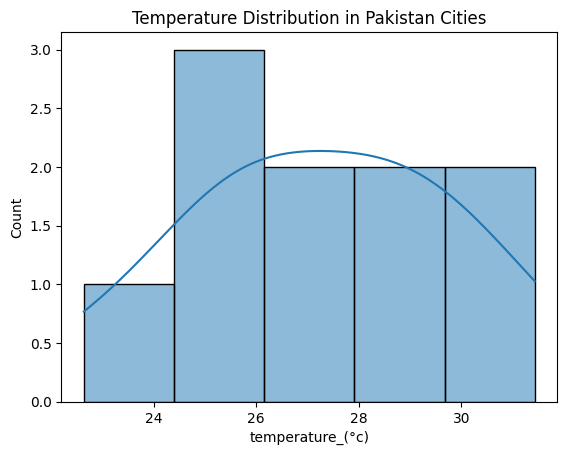

In [44]:
# Temperature distribution
sns.histplot(df['temperature_(°c)'], kde=True)
plt.title('Temperature Distribution in Pakistan Cities')
plt.show()


**Correlation Matrix of Weather Features**

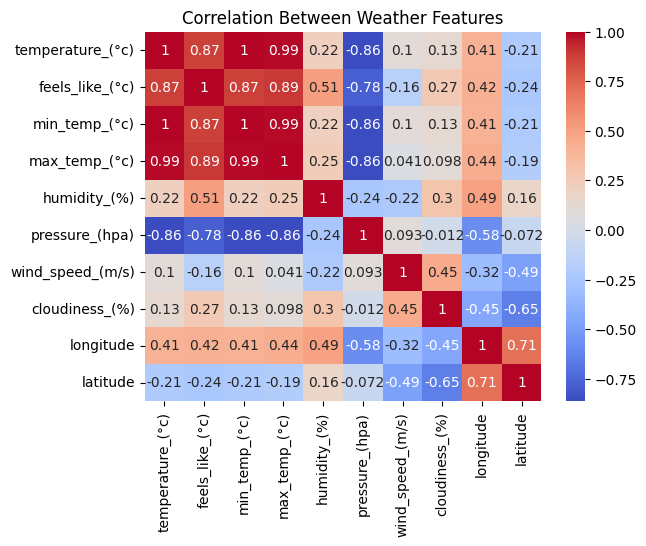

In [46]:
# Correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Weather Features')
plt.show()

**City-wise Summary of Weather Conditions**

In [50]:
# Group by cities and summarize weather conditions
city_summary = df.groupby('city').agg({
    'temperature_(°c)': 'mean',
    'humidity_(%)': 'mean',
    'wind_speed_(m/s)': 'mean'
})

print(city_summary)


            temperature_(°c)  humidity_(%)  wind_speed_(m/s)
city                                                        
Faisalabad             31.43          34.0              3.84
Gujranwala             26.74          67.0              2.82
Islamabad              25.47          78.0              2.21
Karachi                27.90          74.0              4.63
Lahore                 28.99          79.0              2.06
Multan                 29.94          70.0              0.00
Peshawar               25.08          69.0              2.06
Quetta                 22.64          16.0              1.59
Rawalpindi             25.69          78.0              0.89
Sialkot                28.83          82.0              0.00


# **Part 5: Data Visualization Using Seaborn and Matplotlib**

**Scatter Plot of Temperature vs. Humidity**

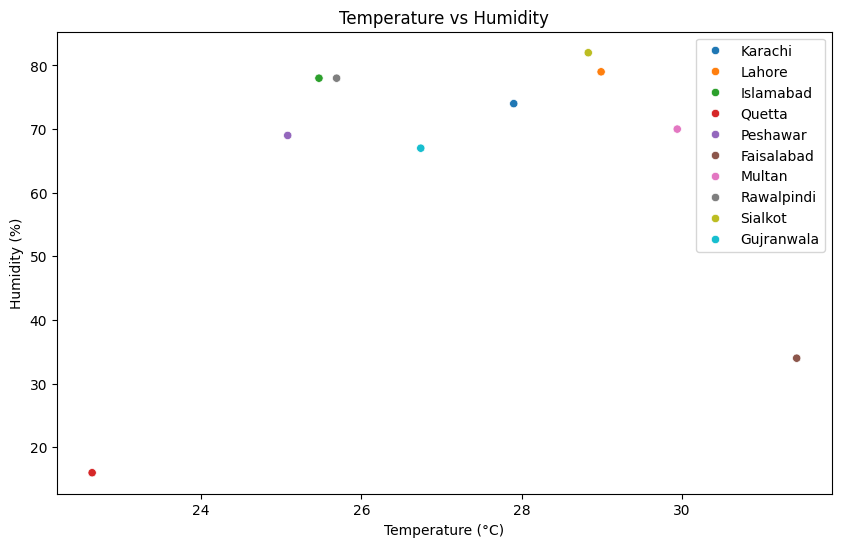

In [52]:
# Scatter plot of temperature vs. humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature_(°c)', y='humidity_(%)', data=df, hue='city')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(loc='upper right')
plt.show()


**Boxplot for Wind Speed Distribution Across Cities**

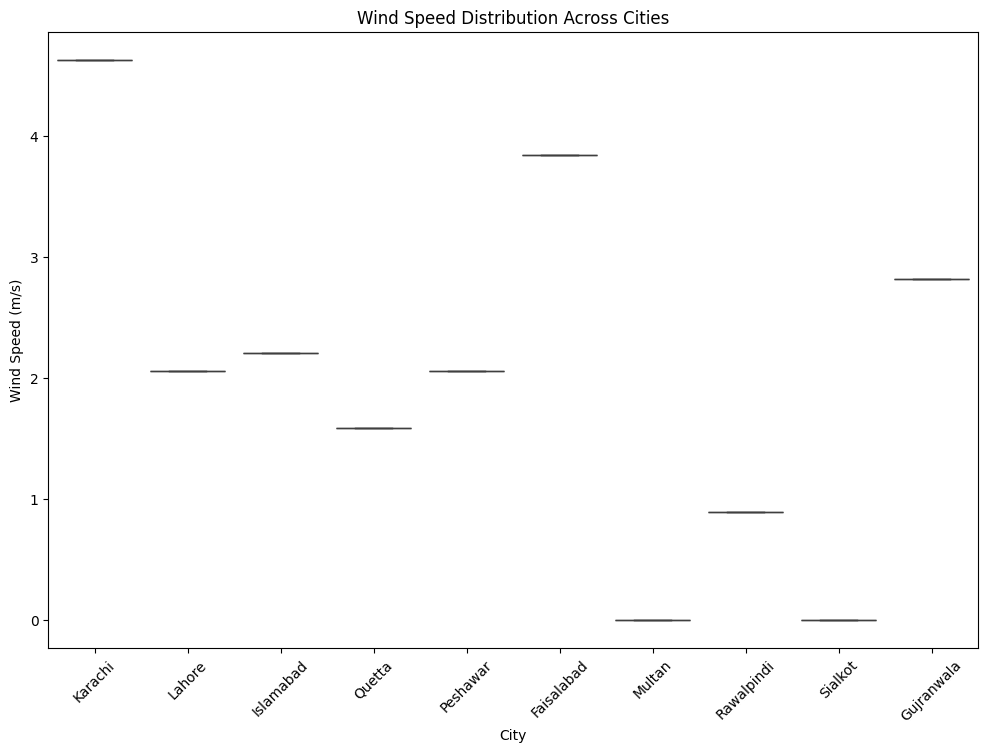

In [53]:
# Boxplot for wind speed across cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='wind_speed_(m/s)', data=df)
plt.title('Wind Speed Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.show()

**Line Plot of Temperature Trends Across Cities**

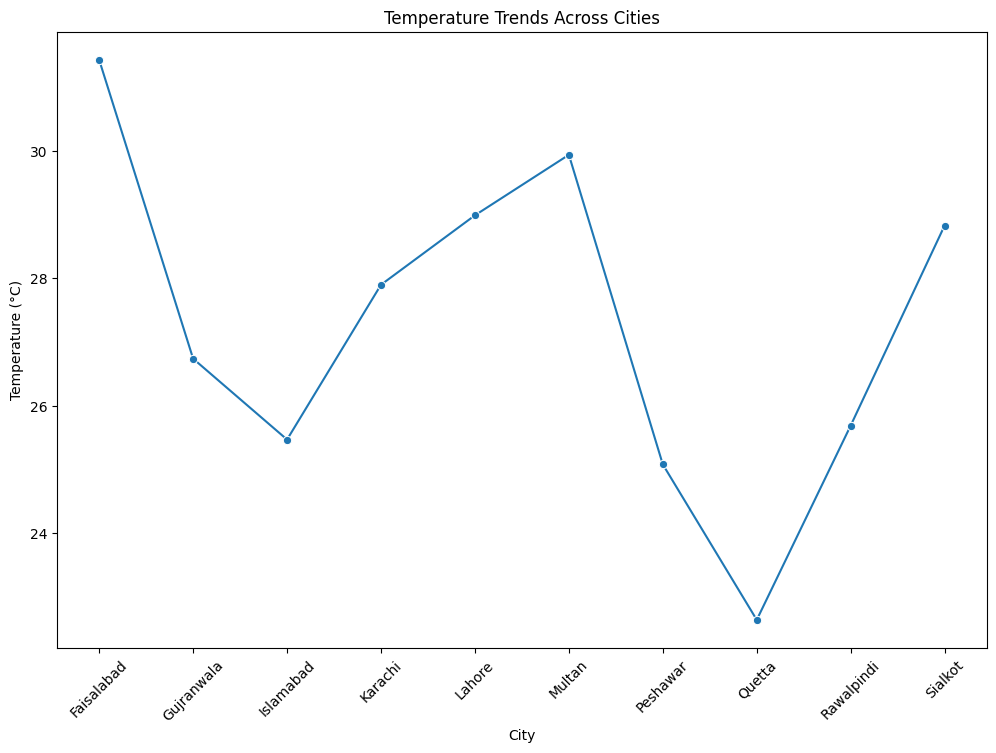

In [54]:
# Line plot of temperature trends across cities
city_summary = df.groupby('city').agg({
    'temperature_(°c)': 'mean',
    'humidity_(%)': 'mean',
    'wind_speed_(m/s)': 'mean'
}).reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='city', y='temperature_(°c)', data=city_summary, marker='o')
plt.title('Temperature Trends Across Cities')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

**Scatter Plot of Cloudiness vs Wind Speed**

<Figure size 1000x600 with 0 Axes>

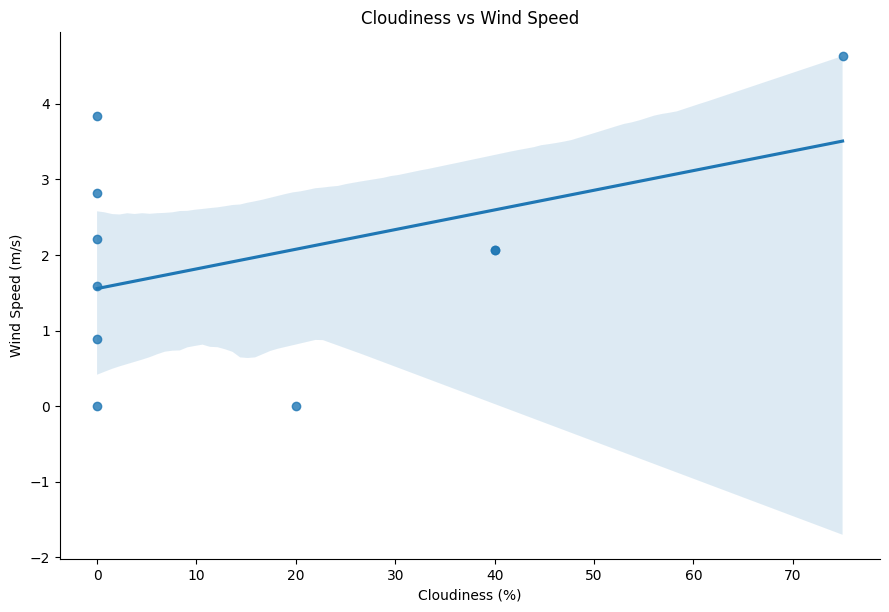

In [55]:
# Visualize the relationship between cloudiness and wind speed
plt.figure(figsize=(10, 6))
sns.lmplot(x='cloudiness_(%)', y='wind_speed_(m/s)', data=df, height=6, aspect=1.5)
plt.title('Cloudiness vs Wind Speed')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Wind Speed (m/s)')
plt.show()

**Histogram of Temperature Distribution**

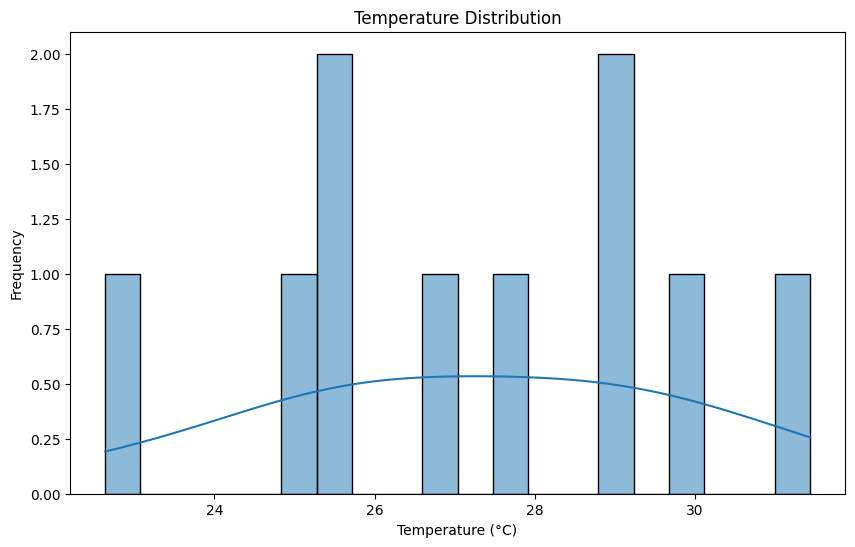

In [57]:
# Histogram of Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature_(°c)'], bins=20, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

**Heatmap of Correlations Between Numerical Variables**

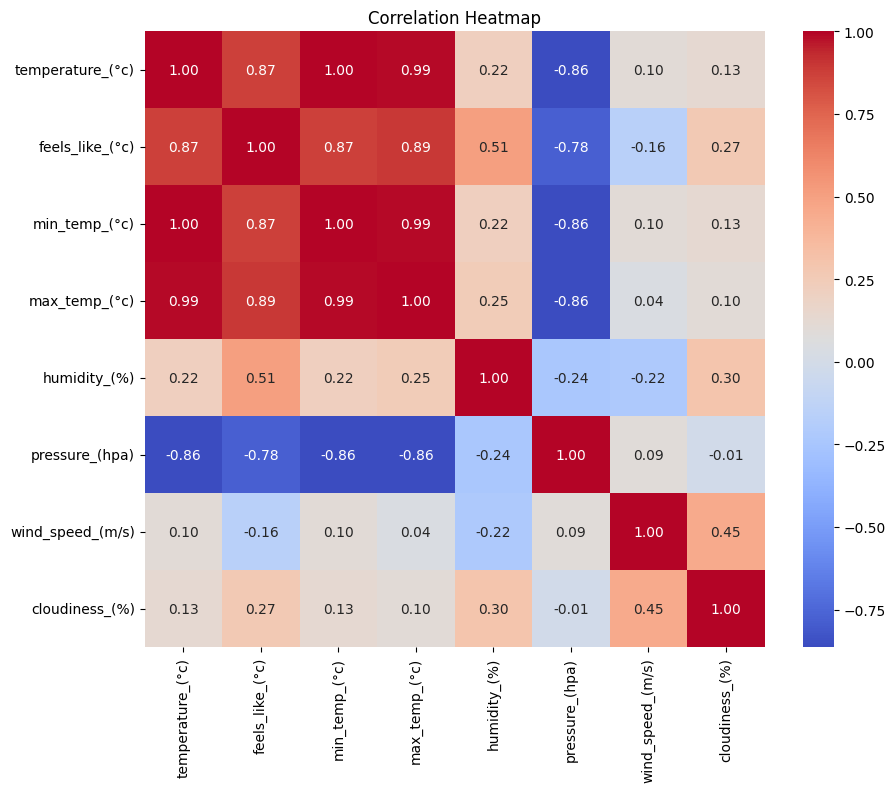

In [60]:
# Heatmap of Correlations Between Numerical Variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[['temperature_(°c)', 'feels_like_(°c)', 'min_temp_(°c)', 'max_temp_(°c)', 'humidity_(%)', 'pressure_(hpa)', 'wind_speed_(m/s)', 'cloudiness_(%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



**Summary Statistics for Average Weather Conditions by City and Province**

In [63]:
# Group by City and Province, and calculate the mean for relevant columns
city_province_group = df.groupby(['province', 'city']).agg({
    'temperature_(°c)': 'mean',
    'humidity_(%)': 'mean',
    'wind_speed_(m/s)': 'mean',
    'cloudiness_(%)': 'mean'
}).reset_index()

# Display the grouped DataFrame
print(city_province_group)

             province        city  temperature_(°c)  humidity_(%)  \
0         Balochistan      Quetta             22.64          16.0   
1           Islamabad   Islamabad             25.47          78.0   
2  Khyber Pakhtunkhwa    Peshawar             25.08          69.0   
3              Punjab  Faisalabad             31.43          34.0   
4              Punjab  Gujranwala             26.74          67.0   
5              Punjab      Lahore             28.99          79.0   
6              Punjab      Multan             29.94          70.0   
7              Punjab  Rawalpindi             25.69          78.0   
8              Punjab     Sialkot             28.83          82.0   
9               Sindh     Karachi             27.90          74.0   

   wind_speed_(m/s)  cloudiness_(%)  
0              1.59             0.0  
1              2.21             0.0  
2              2.06            40.0  
3              3.84             0.0  
4              2.82             0.0  
5           

**Top 20 Cities by Average Temperature**

In [64]:
# Sort by average temperature in descending order
top_cities = city_province_group.sort_values(by='temperature_(°c)', ascending=False).head(20)

**Top 10 Cities with Highest Average Temperature**

In [65]:
# Display the top 10 cities
print(top_cities)

             province        city  temperature_(°c)  humidity_(%)  \
3              Punjab  Faisalabad             31.43          34.0   
6              Punjab      Multan             29.94          70.0   
5              Punjab      Lahore             28.99          79.0   
8              Punjab     Sialkot             28.83          82.0   
9               Sindh     Karachi             27.90          74.0   
4              Punjab  Gujranwala             26.74          67.0   
7              Punjab  Rawalpindi             25.69          78.0   
1           Islamabad   Islamabad             25.47          78.0   
2  Khyber Pakhtunkhwa    Peshawar             25.08          69.0   
0         Balochistan      Quetta             22.64          16.0   

   wind_speed_(m/s)  cloudiness_(%)  
3              3.84             0.0  
6              0.00            20.0  
5              2.06            40.0  
8              0.00             0.0  
9              4.63            75.0  
4           

**Barplot for Average Temperature by City**

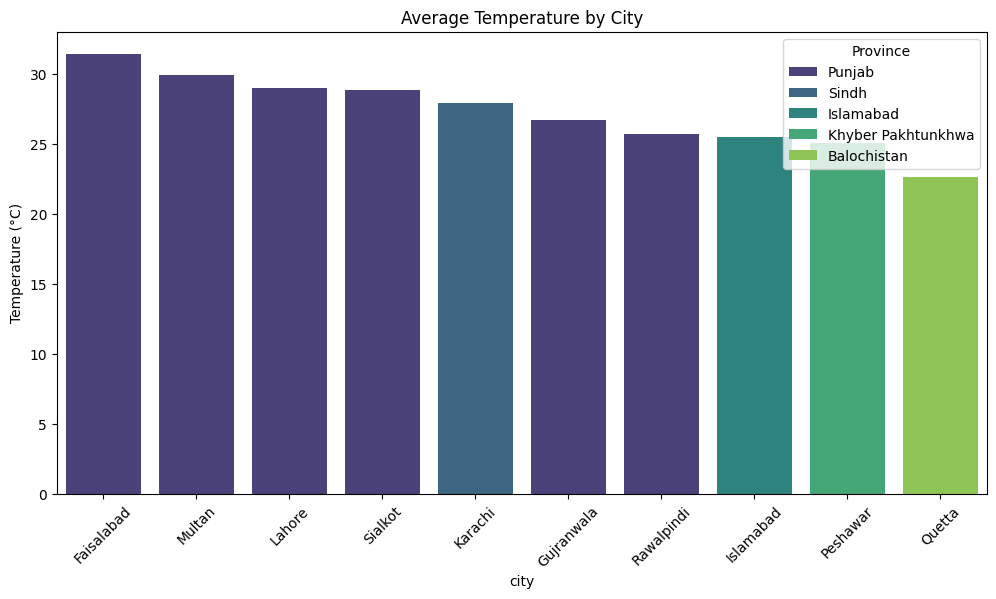

In [73]:
# Barplot for Average Temperature by City
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='temperature_(°c)', data=top_cities, hue='province', palette='viridis')
plt.title('Average Temperature by City')
plt.xticks(rotation=45)
plt.ylabel('Temperature (°C)')
plt.legend(title='Province', loc='upper right')
plt.show()


**Count Plot for Weather Descriptions by City**

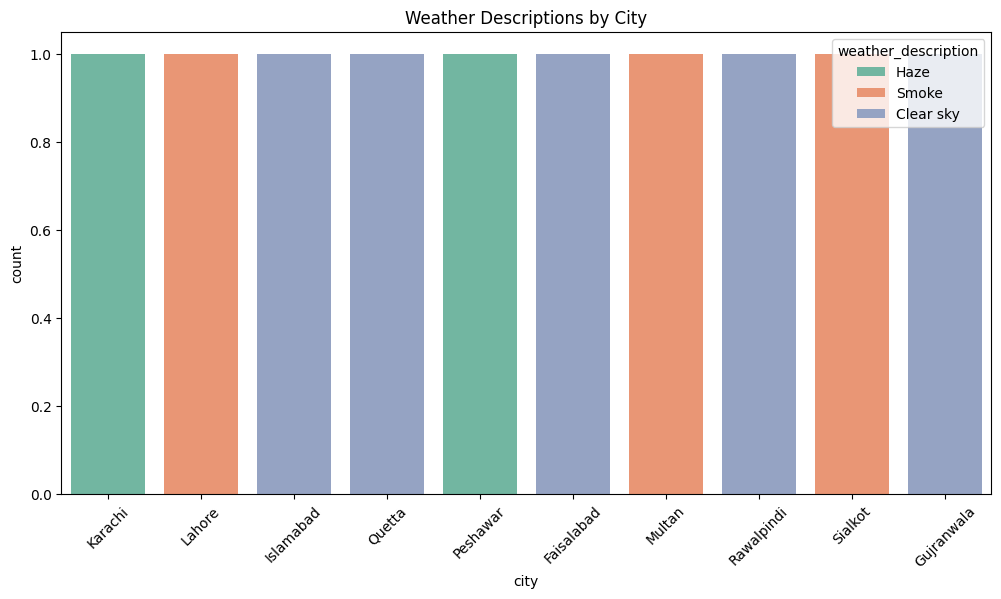

In [75]:
df['weather_description'] = df['weather_description'].astype(str)

# Count plot for weather descriptions by city
plt.figure(figsize=(12, 6))
sns.countplot(x='city', hue='weather_description', data=df, palette='Set2')
plt.title('Weather Descriptions by City')
plt.xticks(rotation=45)
plt.show()